In [1]:
%load_ext autoreload
%autoreload 2

%matplotlib inline
import matplotlib.pyplot as plt
import cv2
import sys
sys.path.insert(0, './tools/')
from waymo_object import WaymoObject, show_lidar_with_depth, show_lidar_on_image, \
                         show_image_with_boxes, show_lidar_topview_with_boxes



from avcv.utils import *
from avcv.vision import *


In [2]:
data_root = '/Pseudo_Lidar_V2/waymo_kitti_converter/data/waymo/'

dataset_name = 'waymo'
image_ext='png' if dataset_name == 'kitti' else 'jpg'
camera_name = 3
cam_id = camera_name - 1 
_paths = glob(f'{data_root}/label_{cam_id}/*')
ids = [int(os.path.basename(path).split('.')[0]) for path in _paths]
dataset = WaymoObject(
    data_root, image_ext=image_ext, image_dir=f'image_{cam_id}', 
    label_dir=f'label_{cam_id}', camera_name=camera_name)

In [3]:
def choose(n):
    data_idx = np.random.choice(ids)
    objects = dataset.get_label_objects(data_idx)
    return data_idx if len(objects) > n else choose(n)

data_idx 24 Num of objects 7


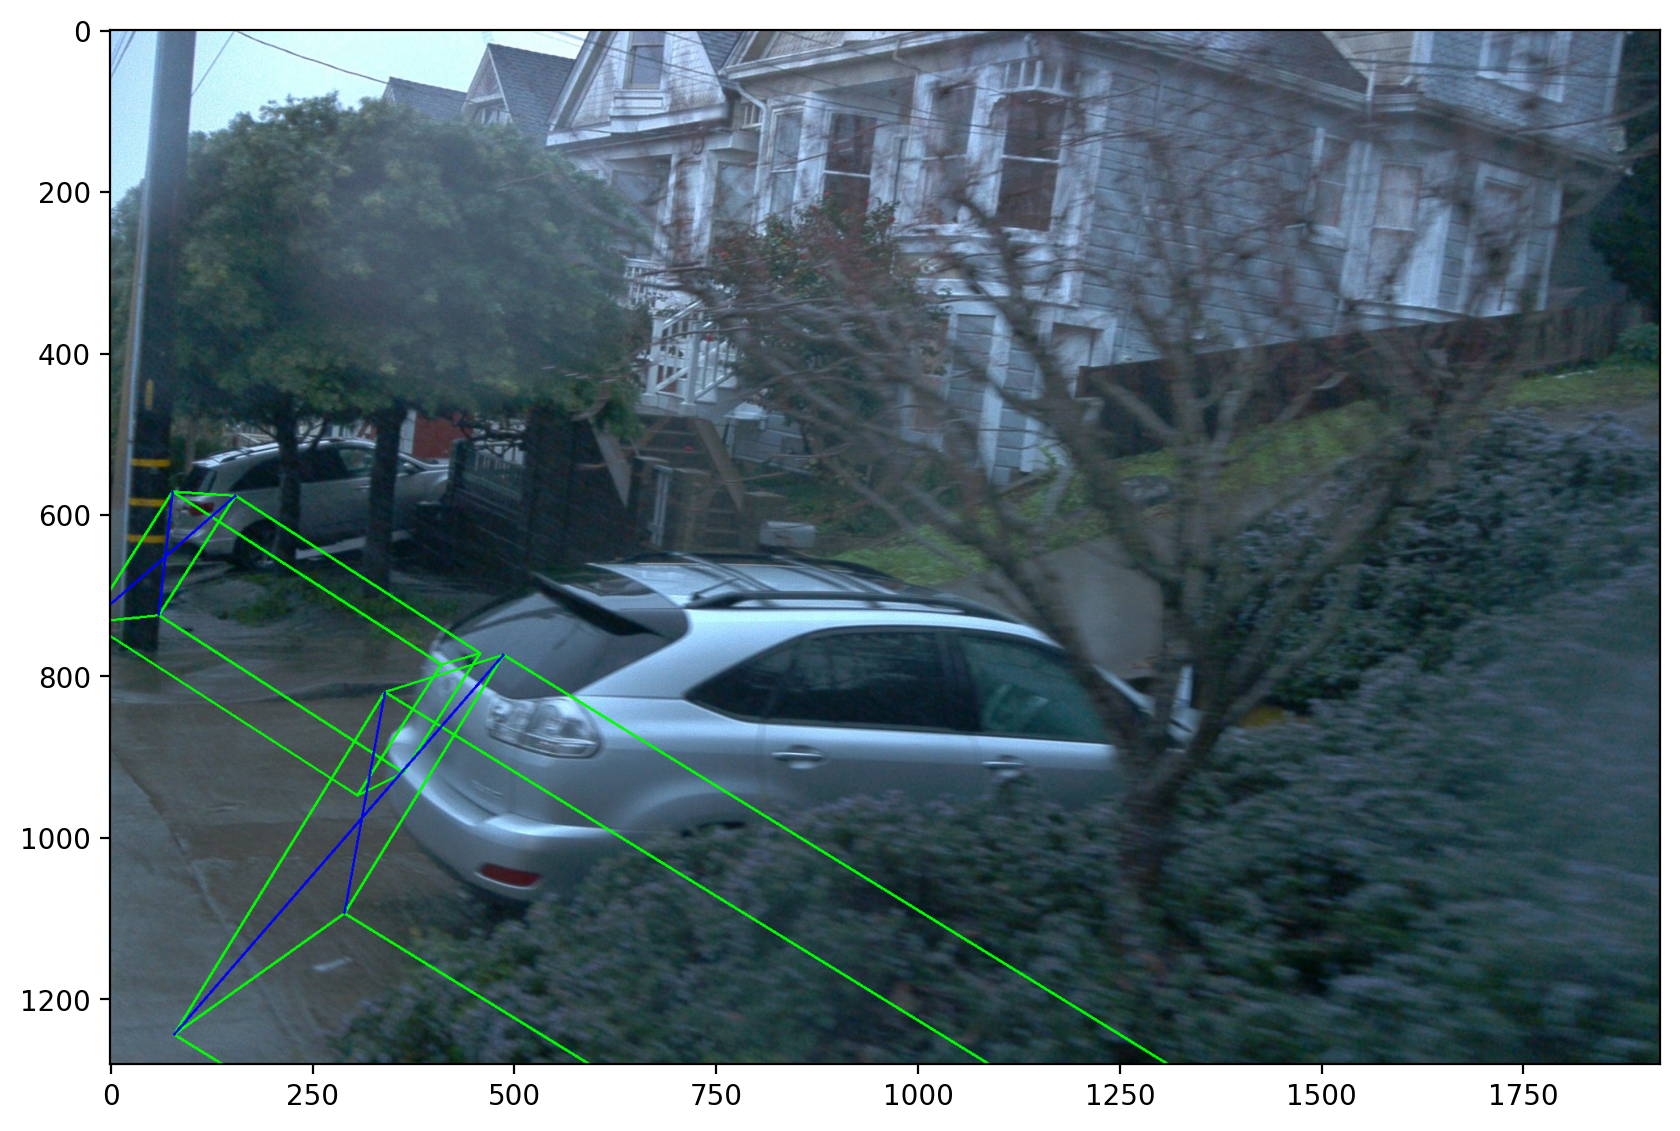

In [5]:
data_idx = 24

objects = dataset.get_label_objects(data_idx)
print('data_idx', data_idx, 'Num of objects', len(objects))
calib = dataset.get_calibration(data_idx)
img = dataset.get_image(data_idx)[...,::-1]
img_bbox2d, img_bbox3d, box3d_pts_2d_list = show_image_with_boxes(img, objects, calib)
show(img_bbox3d, dpi=200)

In [6]:
# img_bbox3d.shape

# Lidar

In [ ]:
#--plot lidar
# pc_velo = dataset.get_lidar(data_idx)

# fig_3d = mlab.figure(bgcolor=(0, 0, 0), size=(800, 450))
# show_lidar_with_depth(pc_velo, objects, calib, fig_3d, True, img_width, img_height)
# fig_3d
# img_lidar = show_lidar_on_image(pc_velo[:, :3], img, calib, img_width, img_height)
# img_lidar = cv2.cvtColor(img_lidar, cv2.COLOR_BGR2RGB)

# fig_lidar = plt.figure(figsize=(14, 7))
# ax_lidar = fig_lidar.subplots()
# ax_lidar.imshow(img_lidar)
# plt.show()

# Bird eye view

In [ ]:
# img_bev = show_lidar_topview_with_boxes(pc_velo, objects, calib)

# fig_bev = plt.figure(figsize=(7, 14))
# ax_bev = fig_bev.subplots()
# ax_bev.imshow(img_bev)
# plt.show()

In [ ]:
!